In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import mixture
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import pickle

import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np

In [2]:
bd = pd.read_csv('./NNData_87.csv')
sd = pd.read_csv('./cfb22_nn_w1_w9.csv')

In [3]:
sd = sd.dropna(axis=0)

In [4]:
bd_target = bd[['home_team_cover_spread']]
sd_target = sd[['home_team_cover_spread']]

In [5]:
bd = bd.drop(['Unnamed: 0','index', 'home_team_cover_spread' ,'year', 'home_conference_ACC', 'home_conference_American Athletic',
       'home_conference_Big 12', 'home_conference_Big Ten',
       'home_conference_Conference USA', 'home_conference_FBS Independents',
       'home_conference_Mid-American', 'home_conference_Mountain West',
       'home_conference_Pac-12', 'home_conference_SEC',
       'home_conference_Sun Belt', 'away_conference_ACC',
       'away_conference_American Athletic', 'away_conference_Big 12',
       'away_conference_Big Ten', 'away_conference_Conference USA',
       'away_conference_FBS Independents', 'away_conference_Mid-American',
       'away_conference_Mountain West', 'away_conference_Pac-12',
       'away_conference_SEC', 'away_conference_Sun Belt', 'neutral_site_False',
       'neutral_site_True'], axis = 1)

In [6]:
sd = sd.drop(['Unnamed: 0', 'home_team_cover_spread','week',  'home_conference_ACC', 'home_conference_American Athletic',
       'home_conference_Big 12', 'home_conference_Big Ten',
       'home_conference_Conference USA', 'home_conference_FBS Independents',
       'home_conference_Mid-American', 'home_conference_Mountain West',
       'home_conference_Pac-12', 'home_conference_SEC',
       'home_conference_Sun Belt', 'away_conference_ACC',
       'away_conference_American Athletic', 'away_conference_Big 12',
       'away_conference_Big Ten', 'away_conference_Conference USA',
       'away_conference_FBS Independents', 'away_conference_Mid-American',
       'away_conference_Mountain West', 'away_conference_Pac-12',
       'away_conference_SEC', 'away_conference_Sun Belt', 'neutral_site_False',
       'neutral_site_True'],axis=1)

In [7]:
bd_num = bd.copy()
sd_num = sd.copy()

In [8]:
len(sd_num.columns)

12

In [9]:
icabd = FastICA().fit_transform(bd_num)
# icabd.mean()

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')

C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [10]:
def kurt(x):
    n = np.shape(x)[0]
    mean = np.sum((x**1)/n) # Calculate the mean
    var = np.sum((x-mean)**2)/n # Calculate the variance
    skew = np.sum((x-mean)**3)/n # Calculate the skewness
    kurt = np.sum((x-mean)**4)/n # Calculate the kurtosis
    kurt = kurt/(var**2)-3

    return kurt, skew, var, mean

In [11]:
bd_red = pd.DataFrame(icabd)
bd_red['target'] = bd_target
bd_red

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,target
0,-0.032741,-0.029696,-0.009417,-0.015568,0.003039,0.015795,-0.003581,0.020526,0.017737,-0.008509,...,0.010657,0.006026,0.031277,0.019023,-0.003853,0.014724,-0.006690,-0.007249,0.006258,0
1,0.008823,-0.010826,0.017925,-0.010772,0.010337,-0.013395,0.022177,0.012704,-0.004884,-0.000965,...,0.001278,-0.002426,0.066311,0.012919,-0.008502,0.007414,0.009393,-0.011572,-0.001676,1
2,0.021890,0.000427,-0.018069,0.018598,0.003986,0.011694,-0.000854,-0.045140,0.008344,0.016117,...,-0.019316,0.004051,0.009930,-0.025382,0.017117,-0.024888,0.038374,0.014967,-0.023001,1
3,0.014305,-0.005278,-0.009769,-0.004266,-0.027834,0.006554,0.002006,0.035002,0.007302,-0.000774,...,-0.007552,-0.000267,-0.008885,-0.008946,0.015319,-0.000217,-0.018432,0.001002,-0.005675,0
4,0.021521,-0.024073,-0.019067,-0.045718,-0.002457,-0.011547,0.000898,-0.007672,0.004839,0.008163,...,-0.010666,0.008289,0.019424,-0.014291,-0.017086,-0.026825,-0.038844,0.000018,0.007438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,-0.013399,0.000425,-0.001505,-0.002622,0.005981,0.004380,-0.068532,0.000845,-0.000738,-0.022735,...,0.008658,-0.021842,-0.002851,0.002322,0.003209,-0.001540,0.001456,-0.009849,0.004548,1
4740,-0.016509,0.000864,-0.012459,-0.005986,-0.015736,0.012485,-0.007090,0.005140,-0.001690,-0.004638,...,0.006907,0.013396,-0.000621,0.000967,-0.002660,-0.008545,0.004890,-0.001214,-0.021541,0
4741,-0.022172,0.003981,-0.002986,-0.000368,0.000359,0.000481,0.009476,-0.001761,0.000513,0.017848,...,0.009555,0.003497,0.031669,-0.001454,-0.000916,-0.001471,0.006088,0.010810,0.000611,0
4742,0.000263,-0.001373,0.010561,-0.003296,0.016685,0.010374,0.004641,0.001027,0.003696,0.018033,...,-0.015412,-0.000587,0.006984,-0.003077,0.002365,0.003079,0.000811,0.032243,0.004037,1


In [12]:
kurt(bd_red)

(0        -0.372476
 1         9.654527
 2        -0.580489
 3         2.377085
 4         0.996263
             ...   
 56        3.765570
 57        2.193599
 58        1.186283
 59        1.900186
 target   -1.999519
 Length: 61, dtype: float64,
 0         1.645228e-08
 1         1.804565e-06
 2        -4.691716e-08
 3         2.732669e-07
 4        -6.087856e-07
               ...     
 56        3.206832e-07
 57        1.232890e-06
 58        3.362982e-08
 59        7.661668e-07
 target    2.739974e-03
 Length: 61, dtype: float64,
 0         0.000211
 1         0.000211
 2         0.000211
 3         0.000211
 4         0.000211
             ...   
 56        0.000211
 57        0.000211
 58        0.000211
 59        0.000211
 target    0.249970
 Length: 61, dtype: float64,
 0        -1.290201e-17
 1        -3.016793e-17
 2         1.073360e-17
 3        -5.887218e-17
 4        -1.734723e-18
               ...     
 56        9.920450e-18
 57        2.087089e-18
 58       -1.8465

Text(0.5, 1.0, 'BD ICA 2 Components')

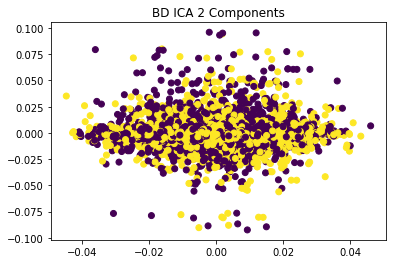

In [13]:
plt.scatter(bd_red.iloc[:, 0], bd_red.iloc[:, 1], c = bd_red['target'])
plt.title("BD ICA 2 Components")

Text(0.5, 0.92, 'BD ICA 3 Components')

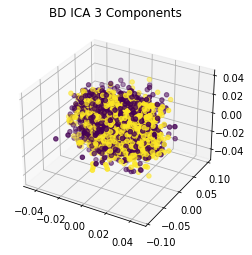

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(bd_red.iloc[:, 0], bd_red.iloc[:, 1], bd_red.iloc[:, 2],c=bd_red['target'])
plt.title("BD ICA 3 Components")

### NN with BD ICA

In [15]:
# bd_red = bd_red.drop('target', axis=1)

bd_red.max(axis=0)

0         0.046040
1         0.095948
2         0.039481
3         0.061019
4         0.063466
            ...   
56        0.070738
57        0.081782
58        0.058542
59        0.075628
target    1.000000
Length: 61, dtype: float64

In [16]:
trainx, testx, trainy, testy = train_test_split(bd_red, bd_target, test_size=.3, random_state=42)

In [17]:
bd_ica_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [18]:
bd_ica_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [19]:
y_train_pred = bd_ica_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = bd_ica_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  1.0
Test accuracy:  1.0


### Small Data ICA

In [20]:
icasd = FastICA().fit_transform(sd_num)

C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [21]:
sd_red = pd.DataFrame(icasd, columns=sd_num.columns)
sd_red['target'] = sd_target
sd_red

,home_elo,away_elo,spread,h_drives,h_d_explosiveness,h_d_successrate,h_d_stuffrate,h_d_totalPPA,h_o_explosiveness,h_o_successrate,h_o_stuffrate,h_o_totalPPA,target
0,-0.002060,0.004017,0.000279,0.016841,-0.025823,-0.049544,0.053073,0.009142,-0.030406,-0.072718,0.036021,-0.018216,1.0
1,0.016955,-0.112731,0.025059,-0.021510,-0.026816,-0.022133,0.036774,-0.021203,0.071892,-0.022271,-0.005581,-0.019293,1.0
2,0.010769,0.029323,-0.070987,0.048590,0.024828,0.064361,-0.011390,-0.004466,0.002608,0.036984,0.005451,-0.060105,0.0
3,-0.021201,-0.005416,-0.032742,0.004604,0.000025,0.050453,0.030760,0.021983,-0.041110,0.070871,-0.026444,0.070660,0.0
4,0.018099,-0.049493,-0.028268,-0.049422,-0.025216,-0.006442,0.036730,0.020532,0.019121,0.048430,-0.000314,0.081891,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,-0.008019,-0.022930,-0.015796,0.017569,0.020773,-0.048307,-0.017238,-0.138943,0.049544,0.018865,-0.061320,-0.037239,0.0
453,-0.021927,0.016181,-0.016956,-0.001722,0.131413,-0.042793,-0.003202,-0.022887,-0.017881,0.058587,-0.021931,-0.013525,1.0
454,0.008558,0.015158,-0.023538,-0.014499,-0.027155,0.007636,0.062029,-0.011034,-0.055229,-0.011337,0.035834,0.026150,0.0
455,-0.014774,-0.028599,-0.061545,-0.074516,0.049699,0.006969,0.029811,0.005183,0.023281,-0.000151,0.064194,-0.051680,1.0


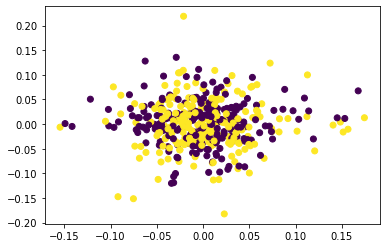

In [22]:
plt.scatter(sd_red.iloc[:, 0], sd_red.iloc[:, 1], c = sd_red['target'])

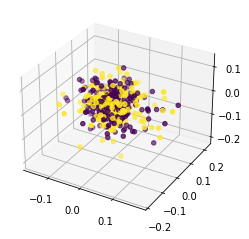

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(sd_red.iloc[:, 0], sd_red.iloc[:, 1], sd_red.iloc[:, 2],c=sd_red['target'])

### Small Data ICA NN

In [24]:
sd_red = sd_red.drop('target', axis=1)
sd_red

,home_elo,away_elo,spread,h_drives,h_d_explosiveness,h_d_successrate,h_d_stuffrate,h_d_totalPPA,h_o_explosiveness,h_o_successrate,h_o_stuffrate,h_o_totalPPA
0,-0.002060,0.004017,0.000279,0.016841,-0.025823,-0.049544,0.053073,0.009142,-0.030406,-0.072718,0.036021,-0.018216
1,0.016955,-0.112731,0.025059,-0.021510,-0.026816,-0.022133,0.036774,-0.021203,0.071892,-0.022271,-0.005581,-0.019293
2,0.010769,0.029323,-0.070987,0.048590,0.024828,0.064361,-0.011390,-0.004466,0.002608,0.036984,0.005451,-0.060105
3,-0.021201,-0.005416,-0.032742,0.004604,0.000025,0.050453,0.030760,0.021983,-0.041110,0.070871,-0.026444,0.070660
4,0.018099,-0.049493,-0.028268,-0.049422,-0.025216,-0.006442,0.036730,0.020532,0.019121,0.048430,-0.000314,0.081891
...,...,...,...,...,...,...,...,...,...,...,...,...
452,-0.008019,-0.022930,-0.015796,0.017569,0.020773,-0.048307,-0.017238,-0.138943,0.049544,0.018865,-0.061320,-0.037239
453,-0.021927,0.016181,-0.016956,-0.001722,0.131413,-0.042793,-0.003202,-0.022887,-0.017881,0.058587,-0.021931,-0.013525
454,0.008558,0.015158,-0.023538,-0.014499,-0.027155,0.007636,0.062029,-0.011034,-0.055229,-0.011337,0.035834,0.026150
455,-0.014774,-0.028599,-0.061545,-0.074516,0.049699,0.006969,0.029811,0.005183,0.023281,-0.000151,0.064194,-0.051680


In [25]:
trainx, testx, trainy, testy = train_test_split(sd_red, sd_target, test_size=.3, random_state=42)

In [26]:
sd_ica_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [27]:
sd_ica_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [28]:
y_train_pred = sd_ica_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = sd_ica_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.5078369905956113
Test accuracy:  0.4855072463768116


## Now cluster the new ICA feutre sets

### Big Data ICA K means

In [29]:
bd_red

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,target
0,-0.032741,-0.029696,-0.009417,-0.015568,0.003039,0.015795,-0.003581,0.020526,0.017737,-0.008509,...,0.010657,0.006026,0.031277,0.019023,-0.003853,0.014724,-0.006690,-0.007249,0.006258,0
1,0.008823,-0.010826,0.017925,-0.010772,0.010337,-0.013395,0.022177,0.012704,-0.004884,-0.000965,...,0.001278,-0.002426,0.066311,0.012919,-0.008502,0.007414,0.009393,-0.011572,-0.001676,1
2,0.021890,0.000427,-0.018069,0.018598,0.003986,0.011694,-0.000854,-0.045140,0.008344,0.016117,...,-0.019316,0.004051,0.009930,-0.025382,0.017117,-0.024888,0.038374,0.014967,-0.023001,1
3,0.014305,-0.005278,-0.009769,-0.004266,-0.027834,0.006554,0.002006,0.035002,0.007302,-0.000774,...,-0.007552,-0.000267,-0.008885,-0.008946,0.015319,-0.000217,-0.018432,0.001002,-0.005675,0
4,0.021521,-0.024073,-0.019067,-0.045718,-0.002457,-0.011547,0.000898,-0.007672,0.004839,0.008163,...,-0.010666,0.008289,0.019424,-0.014291,-0.017086,-0.026825,-0.038844,0.000018,0.007438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,-0.013399,0.000425,-0.001505,-0.002622,0.005981,0.004380,-0.068532,0.000845,-0.000738,-0.022735,...,0.008658,-0.021842,-0.002851,0.002322,0.003209,-0.001540,0.001456,-0.009849,0.004548,1
4740,-0.016509,0.000864,-0.012459,-0.005986,-0.015736,0.012485,-0.007090,0.005140,-0.001690,-0.004638,...,0.006907,0.013396,-0.000621,0.000967,-0.002660,-0.008545,0.004890,-0.001214,-0.021541,0
4741,-0.022172,0.003981,-0.002986,-0.000368,0.000359,0.000481,0.009476,-0.001761,0.000513,0.017848,...,0.009555,0.003497,0.031669,-0.001454,-0.000916,-0.001471,0.006088,0.010810,0.000611,0
4742,0.000263,-0.001373,0.010561,-0.003296,0.016685,0.010374,0.004641,0.001027,0.003696,0.018033,...,-0.015412,-0.000587,0.006984,-0.003077,0.002365,0.003079,0.000811,0.032243,0.004037,1


In [30]:
centers = []
inertia = []
for i in range(1,25):
    km = cluster.KMeans(n_clusters=i, random_state=0).fit(bd_red)
    centers.append(km.cluster_centers_)
    inertia.append(km.inertia_)

C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. A

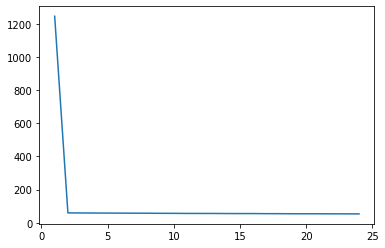

In [31]:
plt.plot(range(1,25),inertia)

In [32]:
kmeansbdica = cluster.KMeans(n_clusters=4)
kmeansbdica.fit(bd_red)
y_kmeans = kmeansbdica.predict(bd_red)
kmbdicalabels = kmeansbdica.labels_

C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


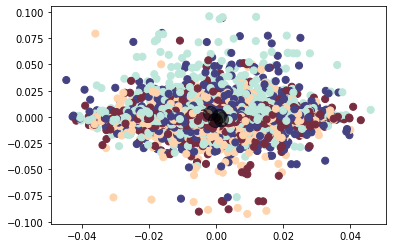

In [33]:
plt.scatter(bd_red.iloc[:, 0], bd_red.iloc[:, 1], c=y_kmeans, s=50, cmap='icefire')

centers = kmeansbdica.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

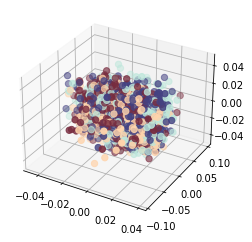

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(bd_red.iloc[:,2],bd_red.iloc[:,1],bd_red.iloc[:,0], c=y_kmeans, s=40, cmap='icefire')

### BD ICA K means NN

In [35]:
bd_km = bd_red.copy()
kmbdicalabels

array([3, 2, 2, ..., 0, 2, 2])

In [36]:
labelsdf = pd.DataFrame(kmbdicalabels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4'])


In [37]:
bdkm = pd.concat([bd_km,labelsdf2], axis=1)
bdkm

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,target,C1,C2,C3,C4
0,-0.032741,-0.029696,-0.009417,-0.015568,0.003039,0.015795,-0.003581,0.020526,0.017737,-0.008509,...,-0.003853,0.014724,-0.006690,-0.007249,0.006258,0,0.0,0.0,0.0,1.0
1,0.008823,-0.010826,0.017925,-0.010772,0.010337,-0.013395,0.022177,0.012704,-0.004884,-0.000965,...,-0.008502,0.007414,0.009393,-0.011572,-0.001676,1,0.0,0.0,1.0,0.0
2,0.021890,0.000427,-0.018069,0.018598,0.003986,0.011694,-0.000854,-0.045140,0.008344,0.016117,...,0.017117,-0.024888,0.038374,0.014967,-0.023001,1,0.0,0.0,1.0,0.0
3,0.014305,-0.005278,-0.009769,-0.004266,-0.027834,0.006554,0.002006,0.035002,0.007302,-0.000774,...,0.015319,-0.000217,-0.018432,0.001002,-0.005675,0,0.0,0.0,0.0,1.0
4,0.021521,-0.024073,-0.019067,-0.045718,-0.002457,-0.011547,0.000898,-0.007672,0.004839,0.008163,...,-0.017086,-0.026825,-0.038844,0.000018,0.007438,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,-0.013399,0.000425,-0.001505,-0.002622,0.005981,0.004380,-0.068532,0.000845,-0.000738,-0.022735,...,0.003209,-0.001540,0.001456,-0.009849,0.004548,1,0.0,1.0,0.0,0.0
4740,-0.016509,0.000864,-0.012459,-0.005986,-0.015736,0.012485,-0.007090,0.005140,-0.001690,-0.004638,...,-0.002660,-0.008545,0.004890,-0.001214,-0.021541,0,1.0,0.0,0.0,0.0
4741,-0.022172,0.003981,-0.002986,-0.000368,0.000359,0.000481,0.009476,-0.001761,0.000513,0.017848,...,-0.000916,-0.001471,0.006088,0.010810,0.000611,0,1.0,0.0,0.0,0.0
4742,0.000263,-0.001373,0.010561,-0.003296,0.016685,0.010374,0.004641,0.001027,0.003696,0.018033,...,0.002365,0.003079,0.000811,0.032243,0.004037,1,0.0,0.0,1.0,0.0


In [38]:
trainx, testx, trainy, testy = train_test_split(bdkm, bd_target, test_size=.3, random_state=42)

In [39]:
bd_km_ica_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [40]:
bd_km_ica_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [41]:
y_train_pred = bd_km_ica_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = bd_km_ica_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  1.0
Test accuracy:  1.0


## ICA Small Data - Kmeans

In [42]:
centers = []
inertia = []
for i in range(1,25):
    km = cluster.KMeans(n_clusters=i, random_state=0).fit(sd_red)
    centers.append(km.cluster_centers_)
    inertia.append(km.inertia_)

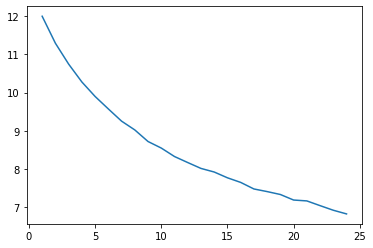

In [43]:
plt.plot(range(1,25),inertia)

In [44]:
kmeanssdica = cluster.KMeans(n_clusters=7)
kmeanssdica.fit(sd_red)
y_kmeans = kmeanssdica.predict(sd_red)
kmsdicalabels = kmeanssdica.labels_

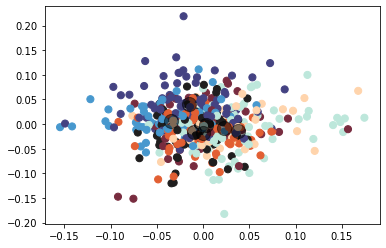

In [45]:
plt.scatter(sd_red.iloc[:, 0], sd_red.iloc[:, 1], c=y_kmeans, s=50, cmap='icefire')

centers = kmeanssdica.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

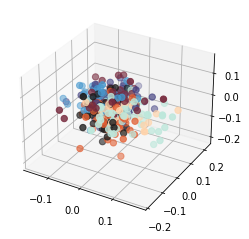

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(sd_red.iloc[:,0],sd_red.iloc[:,1],sd_red.iloc[:,2], c=y_kmeans, s=40, cmap='icefire')

## ICA SD Kmeans NN

In [47]:
sd_km_ica_nn = sd_red.copy()
kmsdicalabels

array([0, 0, 5, 6, 6, 6, 1, 0, 4, 0, 0, 4, 3, 4, 3, 6, 5, 5, 4, 3, 2, 4,
       5, 0, 4, 4, 3, 6, 0, 4, 6, 6, 0, 1, 0, 6, 0, 2, 1, 1, 4, 0, 0, 1,
       4, 0, 1, 1, 3, 5, 6, 1, 5, 2, 2, 3, 5, 1, 1, 4, 4, 2, 0, 4, 3, 2,
       4, 6, 6, 3, 4, 0, 0, 2, 6, 3, 2, 0, 5, 4, 5, 0, 4, 3, 6, 2, 1, 2,
       4, 5, 4, 5, 0, 0, 1, 3, 1, 3, 1, 3, 4, 1, 4, 4, 3, 5, 2, 0, 5, 0,
       0, 1, 0, 4, 2, 6, 2, 2, 4, 5, 4, 5, 0, 0, 5, 2, 4, 5, 0, 2, 1, 4,
       0, 6, 0, 1, 3, 5, 0, 0, 3, 5, 0, 4, 3, 3, 2, 0, 3, 5, 4, 1, 3, 4,
       3, 4, 4, 2, 1, 2, 6, 0, 0, 2, 4, 1, 5, 5, 0, 6, 1, 5, 1, 4, 2, 2,
       2, 5, 5, 3, 4, 6, 2, 5, 5, 0, 6, 4, 4, 0, 4, 4, 1, 4, 2, 4, 0, 2,
       1, 4, 1, 5, 3, 4, 5, 3, 0, 1, 2, 2, 1, 5, 2, 3, 1, 3, 1, 0, 5, 5,
       2, 2, 2, 5, 6, 2, 2, 3, 5, 2, 1, 1, 0, 1, 0, 0, 0, 5, 5, 6, 0, 2,
       6, 3, 3, 2, 1, 3, 5, 0, 5, 1, 6, 5, 2, 0, 4, 5, 1, 3, 3, 6, 5, 3,
       6, 1, 0, 2, 1, 3, 2, 6, 2, 2, 3, 4, 4, 2, 3, 2, 4, 0, 6, 1, 2, 6,
       1, 1, 0, 3, 2, 0, 3, 0, 5, 6, 0, 5, 3, 0, 3,

In [48]:
labelsdf = pd.DataFrame(kmsdicalabels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'])

In [49]:
sd_km_ica_nn_df = pd.concat([sd_km_ica_nn,labelsdf2], axis=1)
sd_km_ica_nn_df

,home_elo,away_elo,spread,h_drives,h_d_explosiveness,h_d_successrate,h_d_stuffrate,h_d_totalPPA,h_o_explosiveness,h_o_successrate,h_o_stuffrate,h_o_totalPPA,C1,C2,C3,C4,C5,C6,C7
0,-0.002060,0.004017,0.000279,0.016841,-0.025823,-0.049544,0.053073,0.009142,-0.030406,-0.072718,0.036021,-0.018216,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016955,-0.112731,0.025059,-0.021510,-0.026816,-0.022133,0.036774,-0.021203,0.071892,-0.022271,-0.005581,-0.019293,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.010769,0.029323,-0.070987,0.048590,0.024828,0.064361,-0.011390,-0.004466,0.002608,0.036984,0.005451,-0.060105,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.021201,-0.005416,-0.032742,0.004604,0.000025,0.050453,0.030760,0.021983,-0.041110,0.070871,-0.026444,0.070660,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.018099,-0.049493,-0.028268,-0.049422,-0.025216,-0.006442,0.036730,0.020532,0.019121,0.048430,-0.000314,0.081891,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,-0.008019,-0.022930,-0.015796,0.017569,0.020773,-0.048307,-0.017238,-0.138943,0.049544,0.018865,-0.061320,-0.037239,0.0,0.0,0.0,1.0,0.0,0.0,0.0
453,-0.021927,0.016181,-0.016956,-0.001722,0.131413,-0.042793,-0.003202,-0.022887,-0.017881,0.058587,-0.021931,-0.013525,0.0,1.0,0.0,0.0,0.0,0.0,0.0
454,0.008558,0.015158,-0.023538,-0.014499,-0.027155,0.007636,0.062029,-0.011034,-0.055229,-0.011337,0.035834,0.026150,0.0,0.0,1.0,0.0,0.0,0.0,0.0
455,-0.014774,-0.028599,-0.061545,-0.074516,0.049699,0.006969,0.029811,0.005183,0.023281,-0.000151,0.064194,-0.051680,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
trainx, testx, trainy, testy = train_test_split(sd_km_ica_nn_df, sd_target, test_size=.3, random_state=42)

In [51]:
sd_km_ica_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [52]:
sd_km_ica_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [53]:
y_train_pred = sd_km_ica_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = sd_km_ica_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.5360501567398119
Test accuracy:  0.5217391304347826


## ICA Big data GMM 

In [54]:
# ~ 2 min
gmm_bic = []
gmm_aic = []
for i in range(1,25):
    gmm = mixture.GaussianMixture(n_components=i, random_state=0).fit(bd_red)
    gmm_bic.append(gmm.bic(bd_red))
    gmm_aic.append(gmm.aic(bd_red))

C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. A

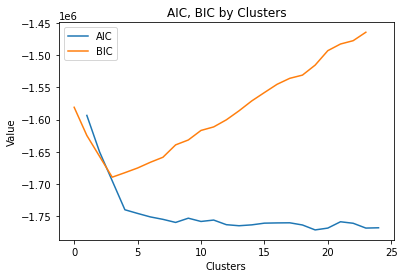

In [55]:
r = np.arange(1,25)
plt.plot(r, gmm_aic, gmm_bic)
plt.title("AIC, BIC by Clusters")
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.legend(labels = ['AIC', 'BIC'])
plt.show()

In [56]:
# We will take AIC + BIC recommendation for simpler model and set K = 4
gmm = mixture.GaussianMixture(n_components=4).fit(bd_red)
icabdgmmlabels = gmm.predict(bd_red)
print(gmm.converged_)

C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


True


C:\Users\magamp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


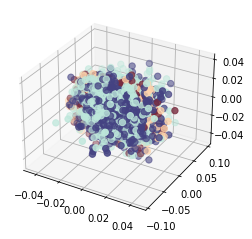

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(bd_red.iloc[:,0],bd_red.iloc[:,1] ,bd_red.iloc[:,2], c=icabdgmmlabels, s=40, cmap='icefire')

## BD ICA GMM NN

In [58]:
bd_red
icabdgmmlabels

array([0, 1, 1, ..., 2, 3, 1], dtype=int64)

In [59]:
labelsdf = pd.DataFrame(icabdgmmlabels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4'])

In [60]:
bd_ica_gmm_nn_df = pd.concat([bd_red,labelsdf2], axis=1)
bd_ica_gmm_nn_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,target,C1,C2,C3,C4
0,-0.032741,-0.029696,-0.009417,-0.015568,0.003039,0.015795,-0.003581,0.020526,0.017737,-0.008509,...,-0.003853,0.014724,-0.006690,-0.007249,0.006258,0,1.0,0.0,0.0,0.0
1,0.008823,-0.010826,0.017925,-0.010772,0.010337,-0.013395,0.022177,0.012704,-0.004884,-0.000965,...,-0.008502,0.007414,0.009393,-0.011572,-0.001676,1,0.0,1.0,0.0,0.0
2,0.021890,0.000427,-0.018069,0.018598,0.003986,0.011694,-0.000854,-0.045140,0.008344,0.016117,...,0.017117,-0.024888,0.038374,0.014967,-0.023001,1,0.0,1.0,0.0,0.0
3,0.014305,-0.005278,-0.009769,-0.004266,-0.027834,0.006554,0.002006,0.035002,0.007302,-0.000774,...,0.015319,-0.000217,-0.018432,0.001002,-0.005675,0,1.0,0.0,0.0,0.0
4,0.021521,-0.024073,-0.019067,-0.045718,-0.002457,-0.011547,0.000898,-0.007672,0.004839,0.008163,...,-0.017086,-0.026825,-0.038844,0.000018,0.007438,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,-0.013399,0.000425,-0.001505,-0.002622,0.005981,0.004380,-0.068532,0.000845,-0.000738,-0.022735,...,0.003209,-0.001540,0.001456,-0.009849,0.004548,1,0.0,0.0,0.0,1.0
4740,-0.016509,0.000864,-0.012459,-0.005986,-0.015736,0.012485,-0.007090,0.005140,-0.001690,-0.004638,...,-0.002660,-0.008545,0.004890,-0.001214,-0.021541,0,0.0,0.0,1.0,0.0
4741,-0.022172,0.003981,-0.002986,-0.000368,0.000359,0.000481,0.009476,-0.001761,0.000513,0.017848,...,-0.000916,-0.001471,0.006088,0.010810,0.000611,0,0.0,0.0,1.0,0.0
4742,0.000263,-0.001373,0.010561,-0.003296,0.016685,0.010374,0.004641,0.001027,0.003696,0.018033,...,0.002365,0.003079,0.000811,0.032243,0.004037,1,0.0,0.0,0.0,1.0


In [61]:
trainx, testx, trainy, testy = train_test_split(bd_ica_gmm_nn_df, bd_target, test_size=.3, random_state=42)

In [62]:
bd_ica_gmm_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [63]:
bd_ica_gmm_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [64]:
y_train_pred = bd_ica_gmm_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = bd_ica_gmm_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  1.0
Test accuracy:  1.0


## ICA Small Data GMM

In [65]:
# ~ 30s 
gmm_bic = []
gmm_aic = []
for i in range(1,25):
    gmm = mixture.GaussianMixture(n_components=i, random_state=0).fit(sd_red)
    gmm_bic.append(gmm.bic(sd_red))
    gmm_aic.append(gmm.aic(sd_red))

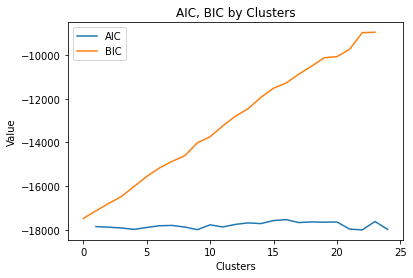

In [66]:
r = np.arange(1,25)
plt.plot(r, gmm_aic, gmm_bic)
plt.title("AIC, BIC by Clusters")
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.legend(labels = ['AIC', 'BIC'])
plt.show()

In [67]:
# Even though AIC rises after 2, for comparison sake we will take AIC + BIC recommendation for simpler model and set K = 2 
gmm = mixture.GaussianMixture(n_components=4).fit(sd_red)
print(gmm.converged_)

True


In [68]:
icasdgmmlabels = gmm.predict(sd_red)
len(icasdgmmlabels)

457

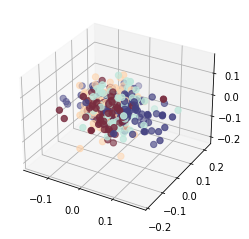

In [69]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(sd_red.iloc[:,0],sd_red.iloc[:,1],sd_red.iloc[:,2], c=icasdgmmlabels, s=40, cmap='icefire')

## ICA SD GMM NN

In [70]:
sd_red
icasdgmmlabels

array([1, 2, 2, 0, 0, 2, 3, 1, 2, 1, 1, 2, 3, 1, 0, 1, 2, 0, 3, 3, 1, 1,
       2, 1, 0, 1, 3, 1, 1, 2, 3, 2, 1, 3, 1, 2, 2, 3, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 3, 2, 1, 1, 0, 3, 1, 3, 2, 1, 0, 2, 3, 1, 1, 2, 3, 2,
       2, 1, 0, 3, 2, 1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 1, 3, 1,
       2, 2, 2, 3, 1, 3, 3, 3, 3, 0, 0, 0, 2, 1, 1, 0, 0, 0, 3, 2, 2, 2,
       1, 3, 1, 2, 1, 3, 2, 3, 2, 3, 2, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2,
       1, 1, 0, 3, 3, 2, 2, 1, 3, 2, 1, 1, 3, 3, 1, 1, 0, 1, 3, 3, 3, 2,
       3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 0, 1, 1, 3, 2, 0, 3, 3, 1,
       1, 3, 3, 3, 3, 1, 3, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0,
       0, 1, 3, 2, 0, 3, 2, 3, 2, 0, 1, 2, 0, 2, 1, 2, 3, 3, 0, 1, 3, 0,
       1, 2, 3, 0, 0, 1, 1, 0, 2, 1, 1, 3, 2, 0, 1, 1, 1, 2, 0, 0, 1, 3,
       0, 3, 0, 3, 0, 3, 0, 0, 2, 0, 1, 2, 3, 3, 1, 2, 0, 2, 3, 2, 0, 3,
       1, 3, 1, 3, 1, 0, 1, 1, 1, 3, 0, 2, 3, 3, 3, 3, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 3, 1, 2, 0, 1, 2, 1, 0, 2, 3, 2, 3,

In [71]:
labelsdf = pd.DataFrame(icasdgmmlabels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4'])

In [72]:
sd_ica_gmm_nn_df = pd.concat([sd_red,labelsdf2], axis=1)
# sd_ica_gmm_nn_df

In [73]:
trainx, testx, trainy, testy = train_test_split(sd_ica_gmm_nn_df, sd_target, test_size=.3, random_state=42)

In [74]:
sd_ica_gmm_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [75]:
sd_ica_gmm_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [76]:
y_train_pred = sd_ica_gmm_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = sd_ica_gmm_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.54858934169279
Test accuracy:  0.5507246376811594
